In this bar graph, I will be presenting on how the passing of english has affected the overall O levels students of that year, in the 5 year period of 2016-2020, and try to find a suitable relation between the rate of passing english and passing O Levels as a whole. Using my datasets, we can see if there is a correlation as in the first dataset, it shows the percentage of students who passed and on the other hand in the second dataset, we can see the percentage of students that progressed to tertiary education. Both these datasets focus on O Level students.
Using a bar and line graph allows me to differentiate both datasets and form a relation which is more effective than 2 line graphs as the data are too far apart from each other.


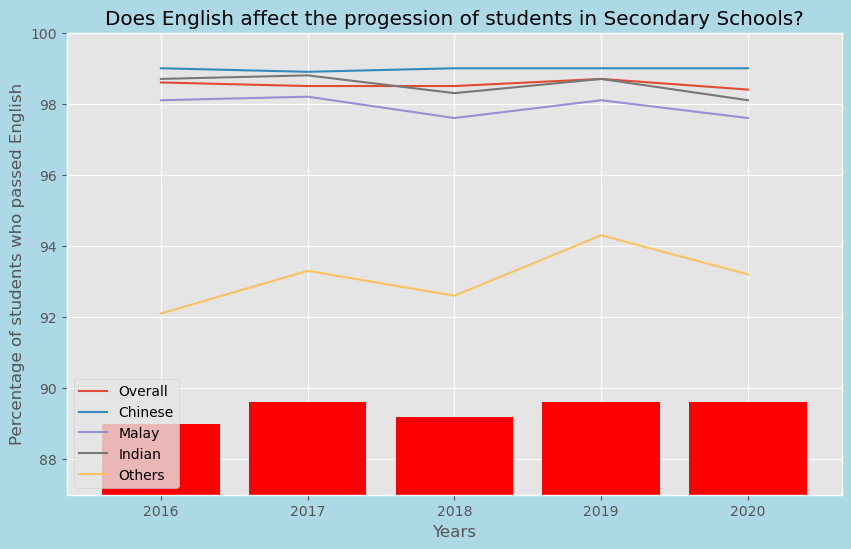

In [112]:
#Analysis 1
import numpy as np
import matplotlib.pyplot as plt

filename = "datasets/percentage-of-gce-o-level-students-who-passed-english-language.csv"
filename1= "datasets/percentage-of-o-level-cohort-that-progressed-to-post-secondary-education.csv"
eng = np.genfromtxt(filename, dtype=['i8','U8', 'f8'],
delimiter=',', names=True)
prog = np.genfromtxt(filename1, dtype=['i4','U8','f8'],
delimiter=',', names=True, missing_values=['na','-'],filling_values=0)
plt.style.use("ggplot")

#Data wrangling
eng_chinese = eng[np.isin(eng['race'],['Chinese'])]
eng_indian = eng[np.isin(eng['race'],['Indian'])]
eng_malay = eng[np.isin(eng['race'],['Malay'])]
eng_others = eng[np.isin(eng['race'],['Others'])]
eng_overall = eng[np.isin(eng['race'],['Overall'])]

a = np.empty(len(eng_chinese), dtype={'names':('date','Chinese','Indian','Malay','Others','Overall'),
                                            'formats':('int','float','float','float','float','float')})
a['date'] = np.unique(eng['year'])
a['Chinese'] =  eng_chinese['percentage_pass_eng'] 
a['Indian'] =  eng_indian['percentage_pass_eng'] 
a['Malay'] =  eng_malay['percentage_pass_eng'] 
a['Others'] =  eng_others['percentage_pass_eng'] 
a['Overall'] =  eng_overall['percentage_pass_eng'] 

prog_chinese = prog[np.isin(prog['race'],['Chinese'])]
prog_indian = prog[np.isin(prog['race'],['Indian'])]
prog_malay = prog[np.isin(prog['race'],['Malay'])]
prog_others = prog[np.isin(prog['race'],['Others'])]
prog_overall = prog[np.isin(prog['race'],['Overall'])]

b = np.empty(len(prog_chinese), dtype={'names':('date','Chinese','Indian','Malay','Others','Overall'),
                                            'formats':('int','float','float','float','float','float')})
b['date'] = np.unique(prog['year'])
b['Chinese'] =  prog_chinese['percentage_progress_postsec'] 
b['Indian'] =  prog_indian['percentage_progress_postsec'] 
b['Malay'] =  prog_malay['percentage_progress_postsec'] 
b['Others'] =  prog_others['percentage_progress_postsec'] 
b['Overall'] =  prog_overall['percentage_progress_postsec'] 

years = ['2016','2017', '2018','2019','2020']
fig,ax = plt.subplots()
fig.set_facecolor("lightblue")
y = a[-5::]['Overall']
line_1 = b[-5::]['Overall'] # getting the values of the last 5 years of progress to plot
line_2 = b[-5::]['Chinese']
line_3 = b[-5::]['Indian']
line_4 = b[-5::]['Malay']
line_5 = b[-5::]['Others']
plt.plot(line_1, label = "Overall")
plt.plot(line_2, label = "Chinese")
plt.plot(line_3, label = "Malay")
plt.plot(line_4, label = "Indian")
plt.plot(line_5, label = "Others")
plt.title('Does English affect the progession of students in Secondary Schools?')
plt.ylabel('Percentage of students who passed English')
plt.xlabel('Years')
plt.bar(years,y, color = 'red')
legend = plt.legend()
plt.ylim(87, 100)
plt.xticks(years)
plt.show()

In the next analysis, we are trying to find out if there has been a decrease in the amount of teachers over the years in Singapore, and whether this has been affecting the students. The datasets contain the ratio of students to teachers as well as the amount of students that at least 5 N level passes or 3 O level passes.
Using a scatterplot, it allows me to see the data through the years 2001-2020. It also allowed me to use a best fit line to see if there really was a correlation/relationship between both datasets. I'll explain more about the data in my slides.

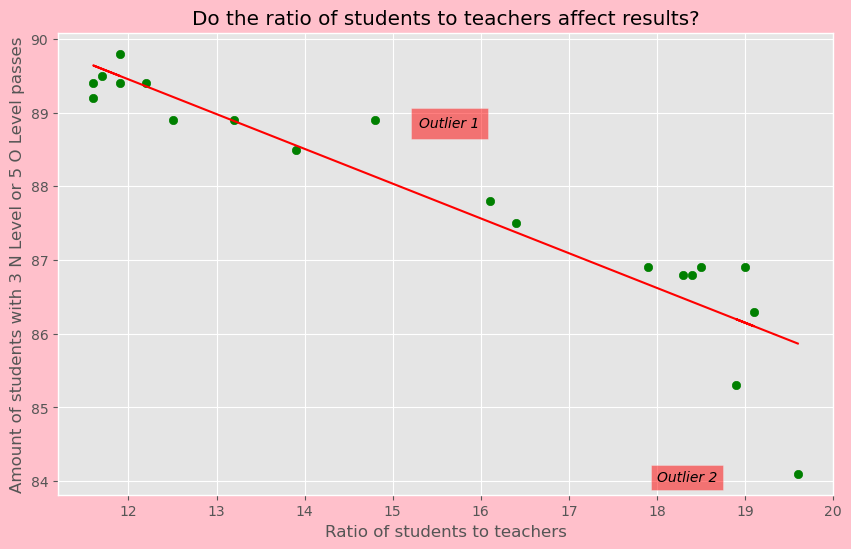

In [100]:
#Analysis 2

import numpy as np
import matplotlib.pyplot as plt

#Are Secondary schools facing staff issues and are less able to pay attention to more students, and is it affecting students?

#For this analysis, I will be analysing the data from 2001-2020

filename = "datasets/pupils-per-teacher-in-secondary-schools.csv"
filename1= "datasets/percentage-of-p1-cohort-who-had-at-least-5-n-level-passes-or-3-o-level-passes.csv"
data = np.genfromtxt(filename, dtype=['i4','f8'],
delimiter=',', names=True)
data1 = np.genfromtxt(filename1, dtype=['i4','f8'],
delimiter=',', names=True)

x1 = data['sec_pupil_to_teacher'][-20::]
y1 = data1['percentage']

fig,ax = plt.subplots()
fig.set_facecolor("pink")
plt.scatter(x1,y1, color = 'green')
ax.text(15.3, 88.8, 'Outlier 1', style='italic', bbox={'facecolor':'red', 'alpha':0.5, 'pad':6})
ax.text(18, 84, 'Outlier 2', style='italic',bbox={'facecolor':'red', 'alpha':0.5, 'pad':4})

m,b = np.polyfit(x1, y1, deg=1)
plt.plot(x1, m*x1 + b, 'r-')
plt.title('Do the ratio of students to teachers affect results?')
plt.ylabel('Amount of students with 3 N Level or 5 O Level passes')
plt.xlabel("Ratio of students to teachers")

plt.show()

In my 3rd analysis, I will be using the dataset of the government expenditure on education over the years. The objective of this analysis is to find out whether the government expenditure over the years has helped to improve the education quality in Singapore. I will be using a line graph as well as a pie chart to see whether the level of education has improved as the expenditure rises. Take note that in the next 2 analyses, I will not be using the data I wrangled, rather I will be using the data given to me so that I am able to use a different form of boolean indexing.

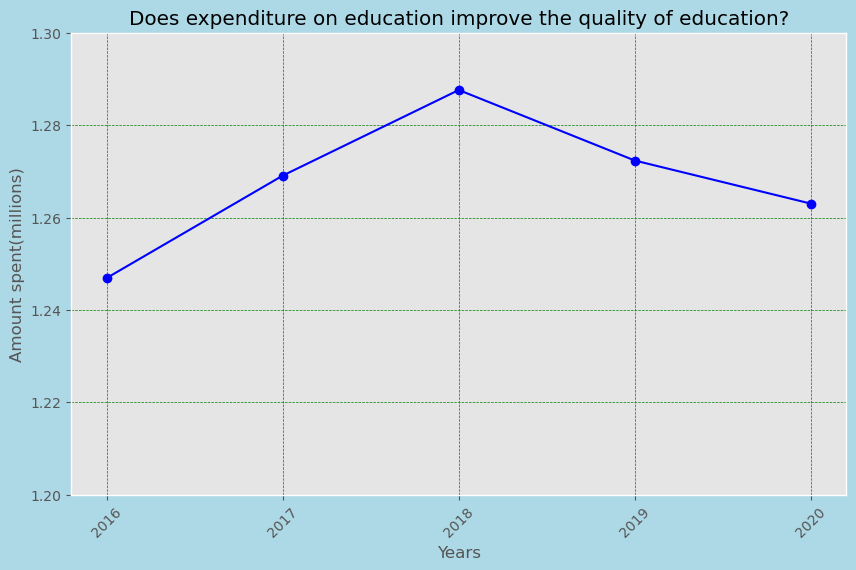

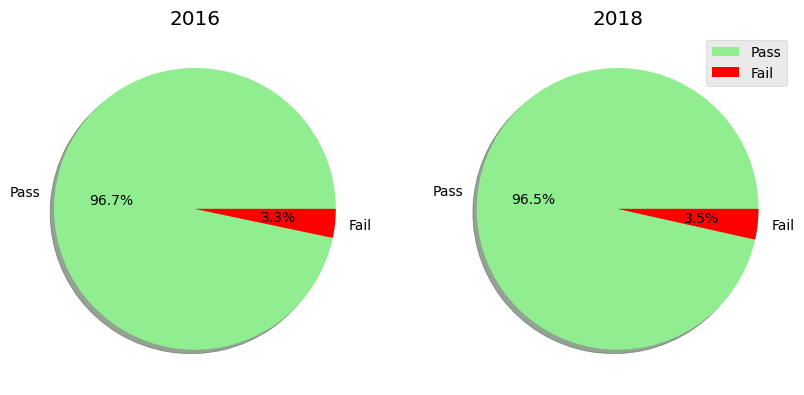

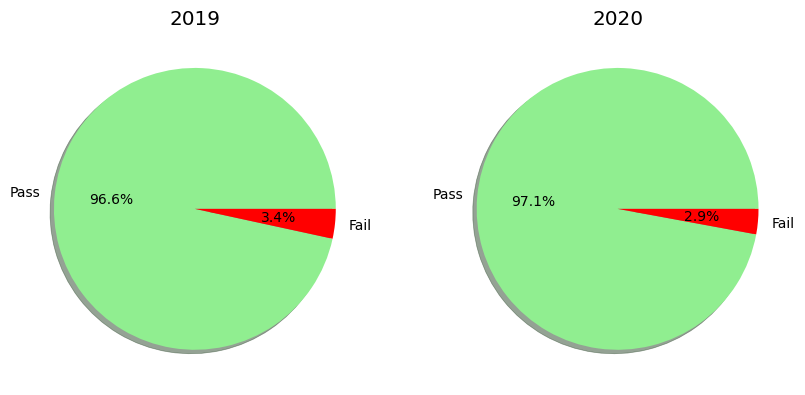

In [111]:
#Analysis 3

import numpy as np
import matplotlib.pyplot as plt

filename = "datasets/government-expenditure-on-education.csv"
filename1 = "datasets/percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv"

data = np.genfromtxt(filename, dtype=['i4','i4'],
delimiter=',', names=True)
data1 = np.genfromtxt(filename1, dtype=['i4','U8','f8'],
delimiter=',', names=True, missing_values=['na','-'],filling_values=0)

#Line graph
money = data['total_expenditure_on_education'][-5::] #extract first (year) column

years = np.arange(5) # 5 years worth of data
y1 = money #fetch last 5 total live births value
y = (y1/10000000)

x = data['year'][-5::]
x_labels = ['2016', '2017', '2018', '2019', '2020']
fig,ax = plt.subplots()
fig.set_facecolor("lightblue")

#Data wrangling
data1_chinese = data1[np.isin(data1['race'],['Chinese'])]
data1_indian = data1[np.isin(data1['race'],['Indian'])]
data1_malay = data1[np.isin(data1['race'],['Malay'])]
data1_others = data1[np.isin(data1['race'],['Others'])]
data1_all = data1[np.isin(data1['race'],['All'])]

a = np.empty(len(data1_chinese), dtype={'names':('date','Chinese','Indian','Malay','Others','All'),
                                            'formats':('int','float','float','float','float','float')})
a['date'] = np.unique(data1['year'])
a['Chinese'] =  data1_chinese['percentage'] 
a['Indian'] =  data1_indian['percentage'] 
a['Malay'] =  data1_malay['percentage'] 
a['Others'] =  data1_others['percentage'] 
a['All'] =  data1_all['percentage'] 

earliestYr = data1['year'].min()
latestYr = data1['year'].max()

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)

ax.plot(y,'bo-')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(x_labels, rotation=45)


#Pie charts
plt.subplot(1,1,1)
plt.xlabel("Years")
plt.ylabel("Amount spent(millions)")
plt.ylim(1.2,1.3,0.1)
plt.title("Does expenditure on education improve the quality of education?")

keyword = 'All'
pct_2016 = data1[data1['race']==keyword]
a1 = pct_2016[pct_2016['year']==2016]
a = a1['percentage']
af = 100-a
a = np.insert(a, 1, af)
labels = "Pass","Fail"
colors = 'lightgreen','red' 

pct_2018 = data1[data1['race']==keyword]
b1 = pct_2018[pct_2018['year']==2018]
b = b1['percentage']
bf = 100-b
b = np.insert(b, 1, bf)

pct_2019 = data1[data1['race']==keyword]
c1 = pct_2019[pct_2019['year']==2019]
c = c1['percentage']
cf = 100-c
c = np.insert(c, 1, cf)

pct_2020 = data1[data1['race']==keyword]
d1 = pct_2020[pct_2020['year']==2020]
d = d1['percentage']
df = 100-d
d = np.insert(d, 1, df)

plt.figure(2)
plt.subplot(121)
plt.title("2016")
plt.pie(a, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True)

plt.subplot(122)
plt.title("2018")
plt.pie(b, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True)
plt.legend()


plt.figure(3)
plt.subplot(121)
plt.title("2019")
plt.pie(c, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True)
plt.subplot(122)
plt.title("2020")
plt.pie(d, labels=labels, colors=colors, autopct='%1.1f%%', shadow = True)

plt.show()

In my fourth and final analysis, I would like to see the improvement in the different races in Singapore (Chinese, Indian, Malay and Others). Using the datasets that were shown before (Students from P1 cohort that managed to progress to post secondary education.) and placing them into box plots, I would like to see which race has improved the most over the last 4 years (no racial discrimination of course).I used the box plot as it allows me to check the different quartiles of results that were achieved by the respective races. Here we go.

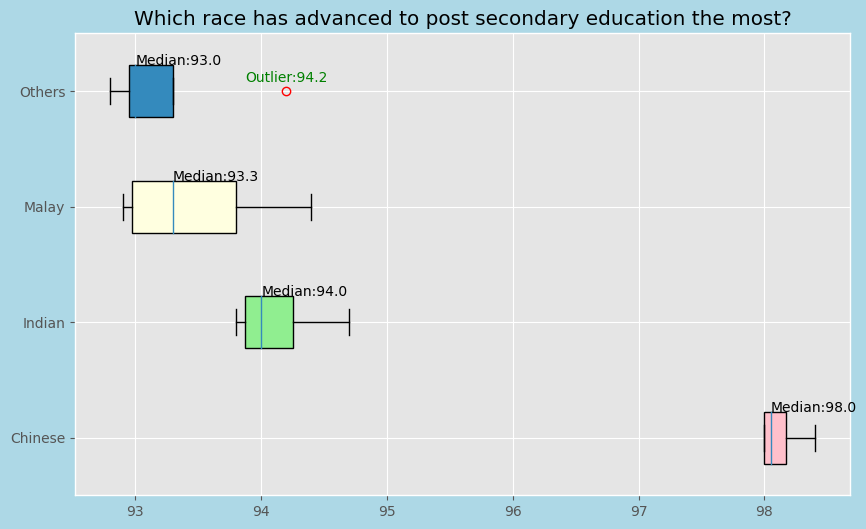

In [109]:
filename= "datasets/percentage-of-p1-cohort-that-progressed-to-post-secondary-education.csv"
data = np.genfromtxt(filename, dtype=['i4','U50','f8'],
delimiter=',', names=True)

#Data wrangling just to show that I can wrangle the data
data_chinese = data[np.isin(data['race'],['Chinese'])]
data_indian = data[np.isin(data['race'],['Indian'])]
data_malay = data[np.isin(data['race'],['Malay'])]
data_others = data[np.isin(data['race'],['Others'])]
data_overall = data[np.isin(data['race'],['All'])]

z = np.empty(len(data_chinese), dtype={'names':('Chinese','Indian','Malay','Others'),
                                            'formats':('float','float','float','float')})

z['Chinese'] =  data_chinese['percentage'] 
z['Indian'] =  data_indian['percentage'] 
z['Malay'] =  data_malay['percentage'] 
z['Others'] =  data_others['percentage']

#2017
a1 = data[data['year']==2017]
a = a1[-4::]['percentage']

#2018
b1 = data[data['year']==2018]
b = b1[-4::]['percentage']

#2019
c1 = data[data['year']==2019]
c = c1[-4::]['percentage']

#2020
d1 = data[data['year']==2020]
d = d1[-4::]['percentage']

labels = np.array(['Chinese','Indian','Malay','Others'])
total = np.concatenate([a,b,c,d])
tB = total.reshape(4,4)

fig,ax = plt.subplots()
fig.set_facecolor("lightblue")

bplot1 = plt.boxplot(tB,labels=labels, patch_artist=True, vert = False, flierprops=dict(markeredgecolor = "red"))

for line in bplot1['medians']:
    x, y = line.get_xydata()[1]
    plt.text(x, y, f'Median:{x:.1f}')
    
bplot1['boxes'][0].set_facecolor('pink')
bplot1['boxes'][1].set_facecolor('lightgreen')
bplot1['boxes'][2].set_facecolor('lightyellow')

plt.title("Which race has advanced to post secondary education the most?")
fliers = []
for line in bplot1['fliers']:
    ndarray = line.get_xydata()
    if (len(ndarray)>0): # will be 0 when no fliers
        max_flier = ndarray[:,0].max()
        max_flier_index = ndarray[:,0].argmax()
        x = ndarray[max_flier_index,0]
        y = ndarray[max_flier_index,1] 
        
plt.text(x,y+0.08,f'Outlier:{max_flier}', horizontalalignment='center',
fontsize=10,color='green')

plt.show()